In [1]:
import csv
import math
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def read_file(filename):
  BASE_PATH = "./"
  lines = []
  with open(BASE_PATH + filename, mode ='r') as file:
    
    # reading the CSV file
    csvFile = csv.reader(file, quoting = csv.QUOTE_NONNUMERIC)
   
    for line in csvFile:
      if line != []:
        lines.append(line)

  return lines

In [3]:
def cal_distance(a, b):
  sum = 0
  # print(a, type(a), b, type(b))
  for index in range(len(a)):
    sum += (a[index] - b[index]) ** 2
  
  return math.sqrt(sum)

In [4]:
def cal_u(cluster_count, xk, centroids, i, m):
  sigma = 0
  for j in range(cluster_count):
    # print("===", type(xk), type(centroids[i]), i)
    up = cal_distance(xk, centroids[i])
    down = cal_distance(xk, centroids[j])
    if down == 0:
      return 0
    sigma += (up / down) ** (2/(m-1)) 
    # print("===", np.power((up/down),(2/(m-1))))
  
  # print(sigma)
  return sigma

In [5]:
def gen_centroids(cluster_count, x):
  return random.sample(x, cluster_count)

In [6]:
def cal_all_u(cluster_count, x, centroids, u, m):
  for data_k in range(len(x)):
      for cluster_i in range(cluster_count):
        # print("1", type(centroids), type(centroids[0]))
        sigma = cal_u(cluster_count, x[data_k], centroids, cluster_i, m)
        if sigma == 0:
          if centroids[cluster_i] == x[data_k]:
            u[cluster_i][data_k] = 1
          else:
            u[cluster_i][data_k] = 0
        else:
          u[cluster_i][data_k] = 1 / sigma
  return u

In [7]:
def update_all_centroids(cluster_count, x, u, m, centroids):
  for cluster_i in range(cluster_count):
      sigma_up = 0
      sigma_down = 0 
      
      for dimension in range(len(x[0])):
        sigma_up = 0
        sigma_down = 0 
        for data_k in range(len(x)):
          # print(type(x[data_k]))
          # print(type(x[data_k][0]))
          # print(data_k)
          sigma_up += x[data_k][dimension] * (u[cluster_i][data_k] ** m)
          sigma_down += u[cluster_i][data_k] ** m
          
        centroids[cluster_i][dimension] = sigma_up / sigma_down
  return centroids

In [8]:
def cal_cost(cluster_count, x, u, m, centroids):
  cost = 0
  for data_k in range(len(x)):
    sum_clusters = 0
    for cluster_i in range(cluster_count):
      sum_clusters += (u[cluster_i][data_k]**m) * (cal_distance(x[data_k], centroids[cluster_i]) ** 2)
    cost += sum_clusters
  return cost

In [9]:
def run_fuzzy(cluster_count, x, m):
  u = np.zeros((cluster_count, len(x)))

  
  centroids = gen_centroids(cluster_count, x)
  # print("1", type(centroids), type(centroids[0]), centroids[0])

  for _ in range(100):
    u = cal_all_u(cluster_count, x, centroids, u, m)
    centriods = update_all_centroids(cluster_count, x, u, m, centroids)
  
  cost = cal_cost(cluster_count, x, u, m, centroids)
  
  return cost, u, centroids

In [10]:

def run_n_times(filename, m, max_cluster_count):
  x = read_file(filename)
  costs = []
  for cluster_count in range(max_cluster_count):
    cost, _, _ = run_fuzzy(cluster_count + 1, x, m)
    costs.append(cost)
  return costs

In [82]:
def plot_cost(max_cluster_count, costs, title, step=1):
    x = np.arange(1, max_cluster_count + 1, step=step)
    y = costs
  
    plt.xlabel("C (Number of Clusters)")
    plt.ylabel("Cost")
    plt.plot(x,y, '-o')
    plt.title(title)
    plt.grid()
    plt.show()

In [12]:
costs1 = run_n_times('data1.csv', m=1.5, max_cluster_count=8)
costs2 = run_n_times('data2.csv', m=1.5, max_cluster_count=8)
costs3 = run_n_times('data3.csv', m=1.5, max_cluster_count=8)
costs4 = run_n_times('data4.csv', m=1.5, max_cluster_count=8)

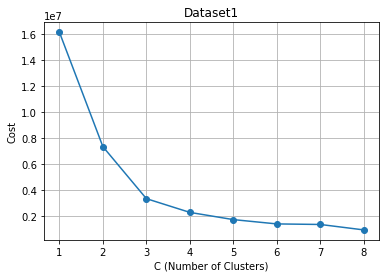

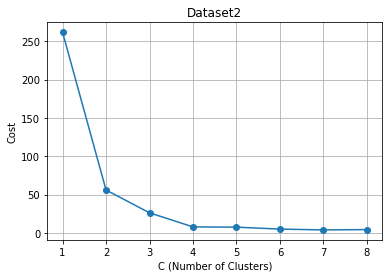

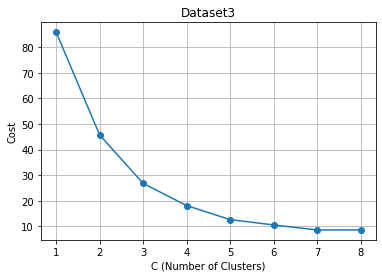

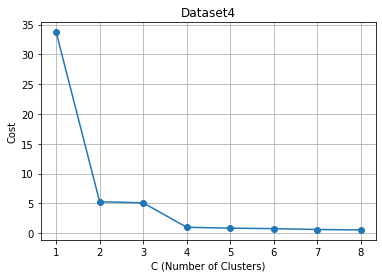

In [13]:
plot_cost(8, costs1, "Dataset1")
plot_cost(8, costs2, "Dataset2")
plot_cost(8, costs3, "Dataset3")
plot_cost(8, costs4, "Dataset4")

با توجه به نمودارهای بالا:
[Dataset1:] C = 4
[Dataset2:] C = 4
[Dataset3:] C = 5
[Dataset4:] C = 4

In [77]:
def plot_2d_clusters(centroids, u, x, title):
  x_points = []
  y_points = []
  for p in x:
    x_points.append(p[0])
    y_points.append(p[1])

  w = np.array([0.3 * i for i in range(len(u[:][0]))])
  u_sum = []
  for data_k in range(len(x)):
    s = 0
    for cluster_i in range(len(centroids)):
      s += u[cluster_i][data_k] * w[cluster_i]
    
    u_sum.append(s)
  
  plt.scatter(x_points, y_points, c=u_sum)
  plt.title(title)

  cen_x = [x for x,y in centroids]
  cen_y = [y for x,y in centroids]
  plt.scatter(cen_x, cen_y, c='red', marker="^", s=200)

In [16]:
x1 = read_file('data1.csv')
costs1_1, u1, centroids1 = run_fuzzy(3, x1, 1.5)

x3 = read_file('data3.csv')
costs3_1, u3, centroids3 = run_fuzzy(4, x3, 1.5)

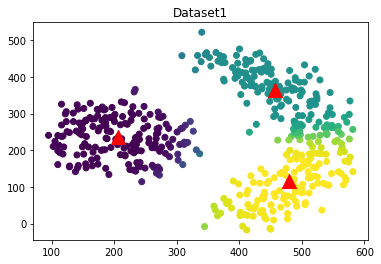

In [78]:
plot_2d_clusters(centroids1, u1, x1, "Dataset1")

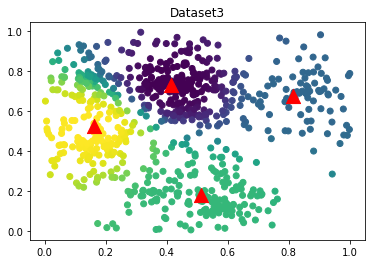

In [79]:
plot_2d_clusters(centroids3, u3, x3, "Dataset3")

بخش امتیازی:

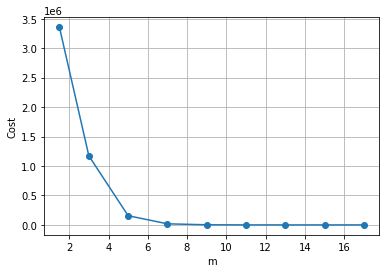

In [96]:
def run_change_m(all_m):
    x = read_file("data1.csv")
    costs = []
    for m in all_m:
        cost, _, _ = run_fuzzy(3, x, m)
        costs.append(cost)
    return costs    

all_m = [1.5, 3, 5, 7, 9 , 11, 13, 15, 17]
costs = run_change_m(all_m)


plt.xlabel("m")
plt.ylabel("Cost")
plt.plot(all_m,costs, '-o')
plt.grid()
plt.show()

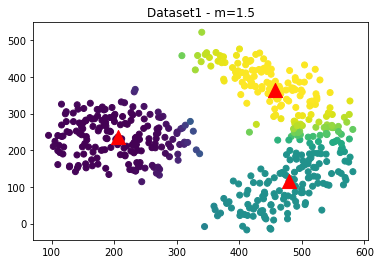

In [88]:
x1 = read_file('data1.csv')
c1, _u1, _centroids1 = run_fuzzy(3, x1, 1.5)
plot_2d_clusters(_centroids1, _u1, x1, "Dataset1 - m=1.5")

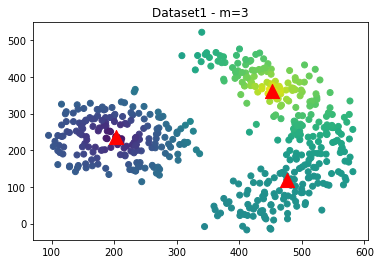

In [89]:
c1, _u1, _centroids1 = run_fuzzy(3, x1, 3)
plot_2d_clusters(_centroids1, _u1, x1, "Dataset1 - m=3")

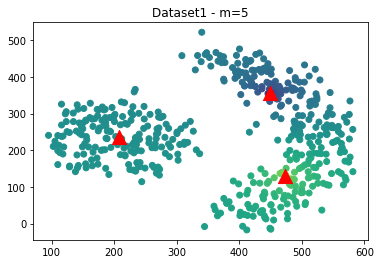

In [90]:
c1, _u1, _centroids1 = run_fuzzy(3, x1, 5)
plot_2d_clusters(_centroids1, _u1, x1, "Dataset1 - m=5")

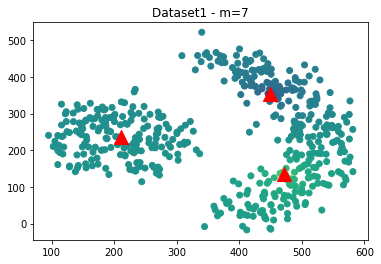

In [91]:
c1, _u1, _centroids1 = run_fuzzy(3, x1, 7)
plot_2d_clusters(_centroids1, _u1, x1, "Dataset1 - m=7")

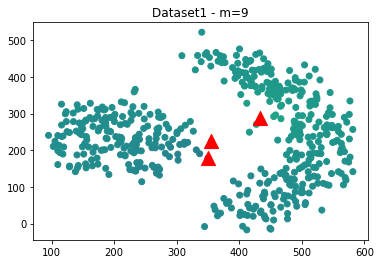

In [92]:
c1, _u1, _centroids1 = run_fuzzy(3, x1, 9)
plot_2d_clusters(_centroids1, _u1, x1, "Dataset1 - m=9")

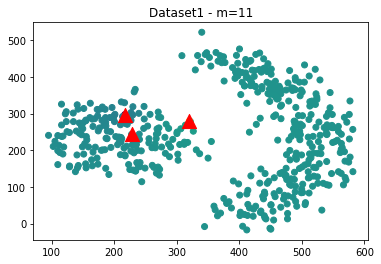

In [93]:
c1, _u1, _centroids1 = run_fuzzy(3, x1, 11)
plot_2d_clusters(_centroids1, _u1, x1, "Dataset1 - m=11")

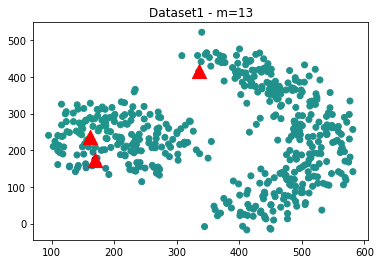

In [94]:
c1, _u1, _centroids1 = run_fuzzy(3, x1, 13)
plot_2d_clusters(_centroids1, _u1, x1, "Dataset1 - m=13")

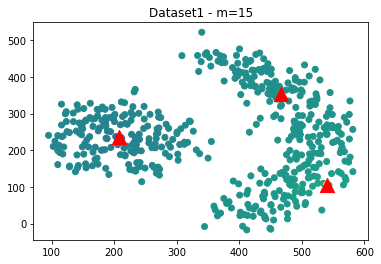

In [95]:
c1, _u1, _centroids1 = run_fuzzy(3, x1, 15)
plot_2d_clusters(_centroids1, _u1, x1, "Dataset1 - m=15")

تحلیل:  
با افزایش   
m  
کلاستر ها نرم تر و فازی تر میشوند  

برای   
c=3  
با افزایش m  
هزینه کاهش میابد.  

   